# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # if (set_count < 21):
    #     continue
    # elif (set_count == 22):
    #     break

    # Create endpoint URL with each city
    response = requests.get(f"{url}{city}").json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, f"{city} {response['cod']}"))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather'][0]['main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [73]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [74]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kastsyukovichy,53.3516,32.0506,19.30,74,93,4.44,BY,1723032229
1,puerto natales,-51.7236,-72.4875,-6.75,93,20,3.09,CL,1723032230
2,birjand,32.8663,59.2211,39.26,2,0,7.20,IR,1723032231
3,papao,-17.7500,-149.5500,24.82,78,13,9.08,PF,1723032232
4,tshabong,-26.0500,22.4500,28.22,16,4,8.15,BW,1723032233


In [76]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [77]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kastsyukovichy,53.3516,32.0506,19.30,74,93,4.44,BY,1723032229
1,puerto natales,-51.7236,-72.4875,-6.75,93,20,3.09,CL,1723032230
2,birjand,32.8663,59.2211,39.26,2,0,7.20,IR,1723032231
3,papao,-17.7500,-149.5500,24.82,78,13,9.08,PF,1723032232
4,tshabong,-26.0500,22.4500,28.22,16,4,8.15,BW,1723032233


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

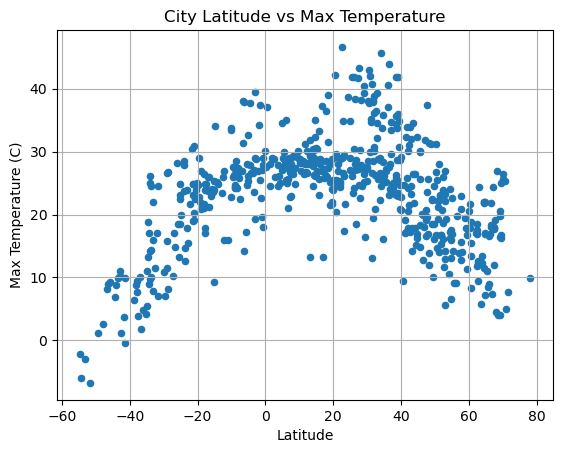

In [78]:
# Build scatter plot for latitude vs. temperature
plt.close('all')
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, title='City Latitude vs Max Temperature')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

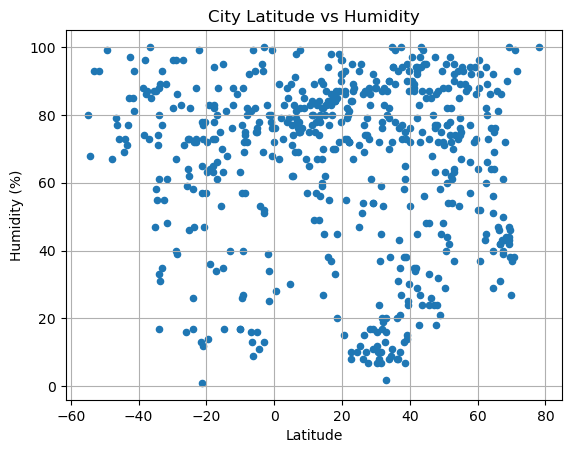

In [79]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, title='City Latitude vs Humidity')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

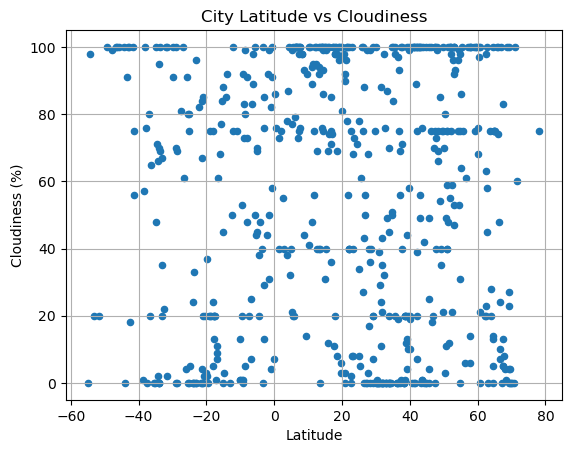

In [80]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, title='City Latitude vs Cloudiness')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

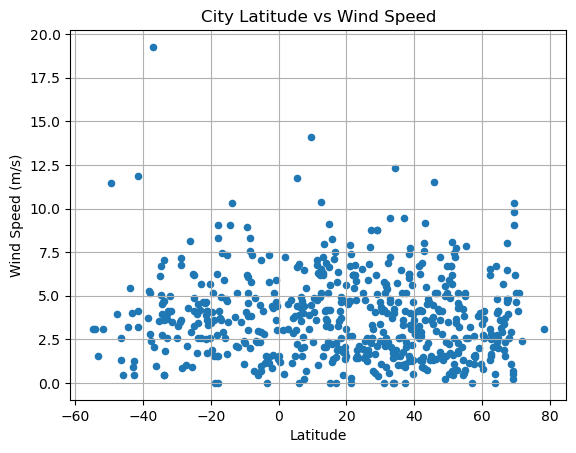

In [81]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, title='City Latitude vs Wind Speed')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (200,10), fontsize=15, color="red", xycoords='axes points')
    print(f"The r-squared is: {rvalue**2}")


In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.count()

City          412
Lat           412
Lng           412
Max Temp      412
Humidity      412
Cloudiness    412
Wind Speed    412
Country       412
Date          412
dtype: int64

In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.count()

City          169
Lat           169
Lng           169
Max Temp      169
Humidity      169
Cloudiness    169
Wind Speed    169
Country       167
Date          169
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.3085938023234107


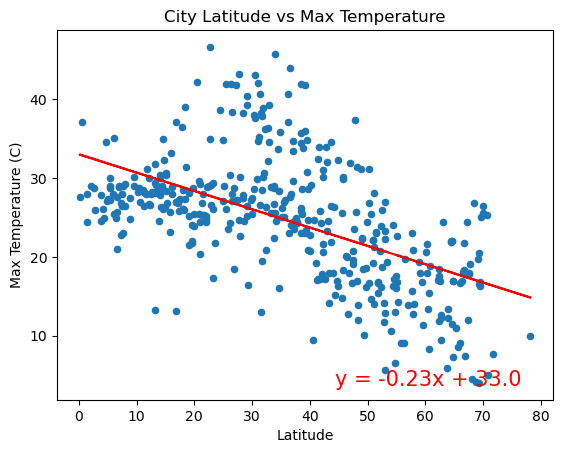

In [85]:
# Build scatter plot for latitude vs. temperature
northern_hemi_df.plot(kind='scatter', x='Lat', y='Max Temp', title='City Latitude vs Max Temperature')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Show plot
plt.show()

The r-squared is: 0.6406284305687918


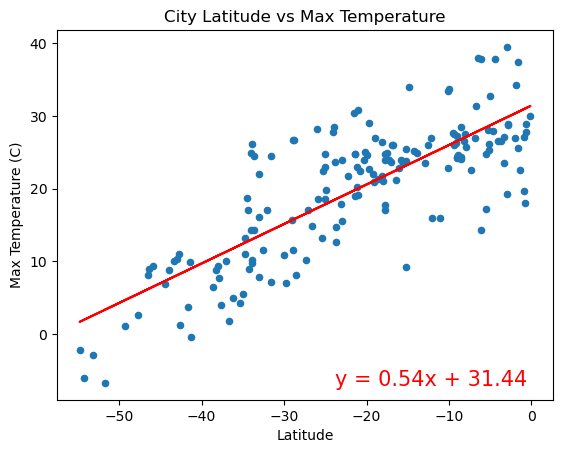

In [86]:
# Build scatter plot for latitude vs. temperature
southern_hemi_df.plot(kind='scatter', x='Lat', y='Max Temp', title='City Latitude vs Max Temperature')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.show()

**Discussion about the linear relationship:** The temperature gets higher as the latitude goes to zero. That's expected because the equator is in latitude zero. In addition, the southern hemisphere temperature changes are steeper compared to the northern hemisphere, likely because of the earth's tilt.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.008246136227123581


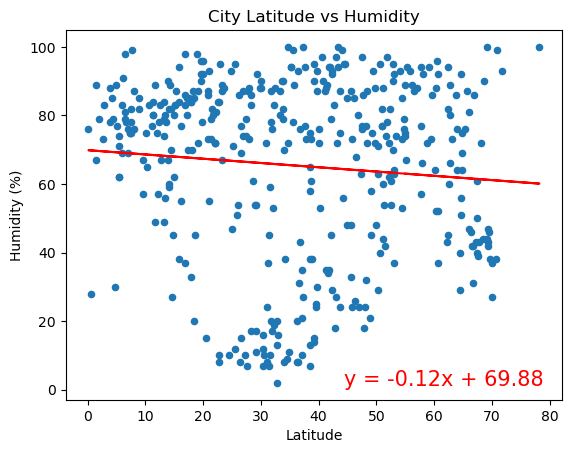

In [87]:
# Build scatter plot for latitude vs. humidity
northern_hemi_df.plot(kind='scatter', x='Lat', y='Humidity', title='City Latitude vs Humidity')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Show plot
plt.show()

The r-squared is: 0.043153354486395075


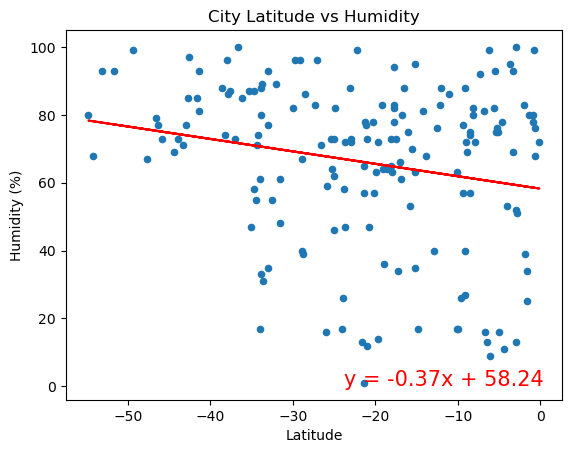

In [88]:
# Build scatter plot for latitude vs. humidity
southern_hemi_df.plot(kind='scatter', x='Lat', y='Humidity', title='City Latitude vs Humidity')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03054809435674896


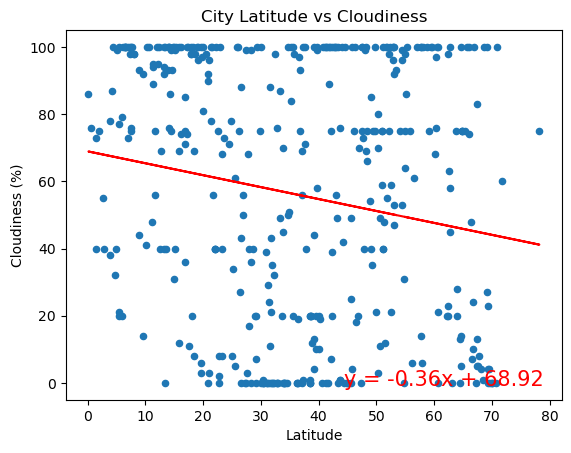

In [89]:
# Build scatter plot for latitude vs. cloudiness
northern_hemi_df.plot(kind='scatter', x='Lat', y='Cloudiness', title='City Latitude vs Cloudiness')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Show plot
plt.show()

The r-squared is: 0.00578064455340916


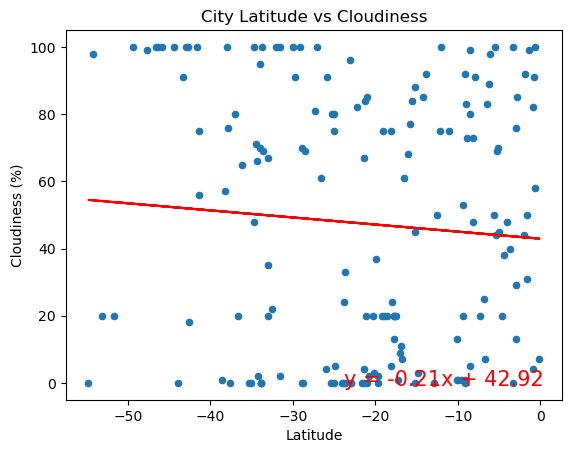

In [90]:
# Build scatter plot for latitude vs. cloudiness
southern_hemi_df.plot(kind='scatter', x='Lat', y='Cloudiness', title='City Latitude vs Cloudiness')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.007067564435677959


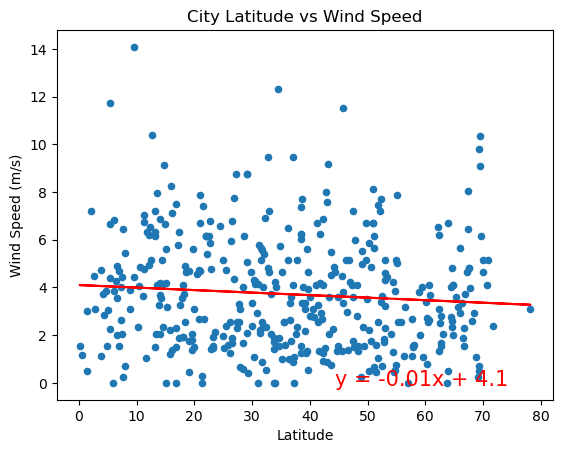

In [91]:
# Build scatter plot for latitude vs. wind speed
northern_hemi_df.plot(kind='scatter', x='Lat', y='Wind Speed', title='City Latitude vs Wind Speed')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Show plot
plt.show()

The r-squared is: 0.0016792000269891904


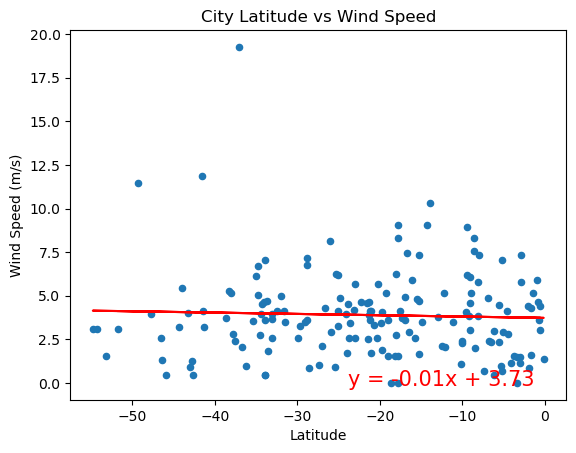

In [92]:
# Build scatter plot for latitude vs. wind speed
southern_hemi_df.plot(kind='scatter', x='Lat', y='Wind Speed', title='City Latitude vs Wind Speed')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Linear regression on Northern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE